<a href="https://colab.research.google.com/github/etorresram/Clustering_Job_Postings_and_Skills_Identificaiton/blob/main/Clustering_Job_Postings_and_Skills_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mapping Digital Skills Demand: An NLP Analysis of Job Postings from Google Careers in Argentina**:


This sample code is designed to identify and analyze the digital skills extracted from job postings in Argentina for the period from January to July 2023. I delve into the identification and analysis of the digital skills demanded by the job market during the period in which the data was extracted using web scraping techniques.



In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

In [7]:
df_arg = pd.read_parquet('/content/jobs_data.parquet')
df_arg.columns.to_list()

['date_posted', 'descrip']

## **Digital skills Identification**

In [8]:
digital_skills_list = [
    # Programming languages
    "python", "r", "sql", "java", "scala", "c++", "c#", "julia", "matlab", "javascript", "typescript", "php", "go", "rust", "ruby", "bash", "perl",
    # Data analysis tools
    "excel", "power bi", "tableau", "looker", "sas", "spss", "stata", "alteryx", "rapidminer", "matplotlib", "seaborn", "plotly", "dash", "d3.js",
    # Cloud and DevOps tools
    "aws", "azure", "gcp", "google cloud", "terraform", "kubernetes", "docker", "jenkins", "ansible", "puppet", "heroku", "cloudformation", "databricks",
    # Big Data & Machine Learning
    "spark", "hadoop", "hive", "kafka", "pig", "tensorflow", "pytorch", "scikit-learn", "keras", "xgboost", "lightgbm", "mlflow", "h2o.ai", "sagemaker"
    # Databases
    "mysql", "postgresql", "oracle", "sql server", "sqlite", "mongodb", "cassandra", "neo4j", "redis", "dynamodb", "bigquery", "snowflake", "redshift",
    # Collaboration and automation tools
    "git", "github", "gitlab", "bitbucket", "jira", "confluence", "zapier", "airflow", "nifi", "sentry", "selenium", "appium", "robot framework",
    # Platforms and services
    "power automate", "service now", "salesforce", "sap", "workday", "hubspot", "zendesk", "mailchimp", "sharepoint", "notion", "trello", "asana",
    # NLP and text processing tools
    "spacy", "nltk", "gensim", "transformers", "openai api", "llamaindex", "huggingface", "bert", "gpt", "llms", "roberta", "jupyter", "knime", "datarobot",
    "autocad", "revit", "solidworks", "sketchup", "ansys", "etabs", "civil 3d", "staad.pro",
    # Graphic Design and Multimedia
    "photoshop", "illustrator", "indesign", "coreldraw", "figma", "sketch", "blender", "cinema 4d", "procreate", "affinity designer",
    # Finance and Accounting
    "quickbooks", "xero", "sage 50cloud", "bloomberg terminal",
    # Data Science and Analytics
    "jupyter notebooks", "knime", "datarobot",
    # Healthcare and Medicine
    "epic systems", "cerner", "meditech", "mckesson", "snomed ct", "pacs", "athenahealth", "openemr",
    # Marketing and Sales
    "marketo", "ahrefs", "semrush", "hootsuite", "activecampaign",
    # Education and E-learning
    "moodle", "google classroom", "edmodo", "blackboard", "kahoot", "articulate 360", "canvas lms", "edpuzzle", "quizizz",
    # Software Development and IT
    "visual studio code", "pycharm", "eclipse", "intellij idea", "postman",
    # Logistics and Inventory Management
    "sap scm", "oracle scm cloud", "manhattan associates", "blue yonder", "fishbowl inventory", "netsuite erp",
    # Cybersecurity
    "wireshark", "metasploit", "nmap", "snort", "kali linux", "splunk", "bitdefender gravityzone",
    # Other relevant technical concepts
    "api", "rest api", "graphql", "microservices", "ci/cd", "web scraping", "etl", "data pipeline", "big data", "machine learning", "deep learning",
    "artificial intelligence", "computer vision", "natural language processing", "word", "power point", "microsoft teams", "corel", "vscode",
]

pattern = r'\b(?:' + '|'.join(re.escape(skill) for skill in digital_skills_list) + r')\b'

def extract_skills(description):
    if pd.isna(description):
        return []
    found_skills = set(re.findall(pattern, description.lower()))
    return sorted(found_skills)

df_arg['digital_skills'] = df_arg['descrip'].apply(extract_skills)


In [9]:
df_arg[['descrip', 'digital_skills']].head(10)

,descrip,digital_skills
0,MEDICOS SIN FRONTERAS – SECCIÓN MSF LAT busca:...,[sap]
1,"En Telefónica- Movistar, tenemos como Misión h...","[oracle, sql]"
2,No hemos encontrado nada para tu búsqueda\n\nL...,"[excel, r]"
3,Local Unit & Position Description\n\nAre you D...,[word]
4,Somos una empresa de industria nacional que br...,"[api, autocad, excel, sap, word]"
5,Descripción del empleo\nOverview of Libertex A...,[salesforce]
6,Service Delivery Coordinator – Río Grande (Tie...,[]
7,Service Delivery Coordinator – Río Grande (Tie...,[]
8,Company Description\n\nAt Turner & Townsend we...,[]
9,Job Description\n\nPurpose\n\nThe Argentina Fi...,[]


## **Clustering process of the variable description**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
!pip install umap-learn
import umap.umap_ as umap

In [11]:
# Step 1: Text preprocessing
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    # Remove accents
    text = re.sub(r'[áàäâ]', 'a', text)
    text = re.sub(r'[éèëê]', 'e', text)
    text = re.sub(r'[íìïî]', 'i', text)
    text = re.sub(r'[óòöô]', 'o', text)
    text = re.sub(r'[úùüû]', 'u', text)
    # Remove punctuation, digits, and extra spaces
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing
df_arg['clean_descrip'] = df_arg['descrip'].apply(preprocess_text)

# Step 2: Define Spanish stop words
spanish_stopwords = {
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una',
    'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre',
    'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos',
    'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí',
    'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho',
    'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros','hs',
    'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío','hace',
    'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro','san',
    'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy',
    'estás', 'está', 'estamos', 'estáis', 'están', 'estuve', 'estuviste', 'estuvo', 'estuvimos', 'estuvisteis',
    'estuvieron', 'estando', 'estado', 'estada', 'estados', 'estadas', 'estuve', 'estuviste', 'estuvo', 'estuvimos',
    'estuvisteis', 'estuvieron', 'teniendo', 'tenido', 'tenida', 'tenidos', 'tenidas', 'teníamos', 'teníais',
    'tenían', 'tuve', 'tuviste', 'tuvo', 'tuvimos', 'tuvisteis', 'tuvieron', 'vos', 'es', 'ser', 'mas', 'aos', 'si'
}

combined_stopwords = list(text.ENGLISH_STOP_WORDS.union(spanish_stopwords))

vectorizer = TfidfVectorizer(max_features=3000, stop_words=combined_stopwords)
X = vectorizer.fit_transform(df_arg['clean_descrip'])
terms = vectorizer.get_feature_names_out()


In [12]:
# STEP 3: Apply Clustering (K-means)
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_arg['cluster'] = kmeans.fit_predict(X)

In [ ]:
# STEP 4: Dimensionality Reduction (UMAP)
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = umap_reducer.fit_transform(X)

df_arg['x'] = embedding[:, 0]
df_arg['y'] = embedding[:, 1]

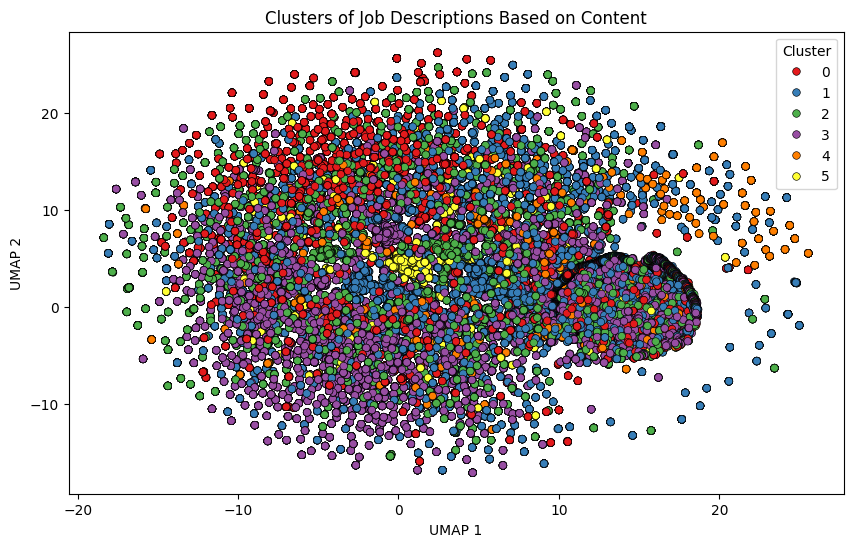

In [15]:
# STEP 5: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='cluster', data=df_arg, palette='Set1', edgecolor='black', s=30)
plt.title('Clusters of Job Descriptions Based on Content')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Cluster')
plt.grid(False)
plt.show()

# **Finding topics by cluster**

# Word Frequency per Cluster

**Main findings:**
* **Cluster 0** contains many words related to sales, clients, commerce, and products (likely jobs in the retail sector).
* **Cluster 1** includes words like remote, data, and team (it might include people with more digital skills).
* **Cluster 3** has words associated with management, control, quality, and development (likely related to leadership and administrative activities).
* **Cluster 4** contains the words that most frequently appear in job postings written in English.




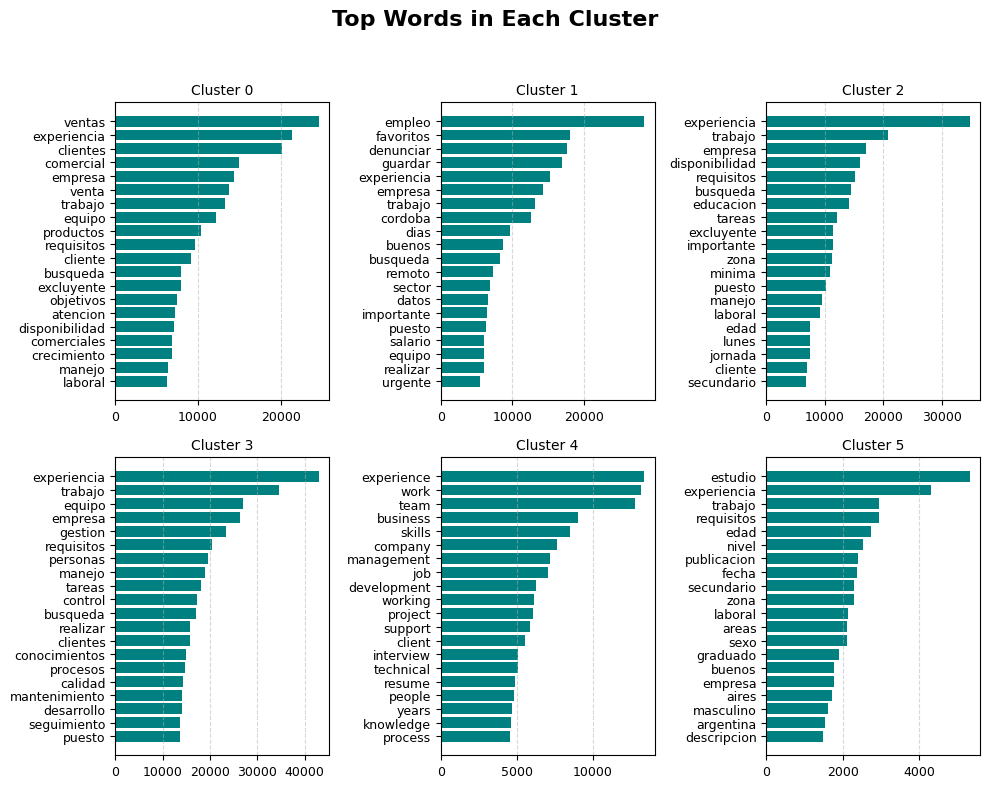

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=combined_stopwords, max_features=20)

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Top Words in Each Cluster', fontsize=16, fontweight='bold')

for idx, cluster_num in enumerate(sorted(df_arg['cluster'].unique())):
    cluster_text = " ".join(df_arg[df_arg['cluster'] == cluster_num]['clean_descrip'])
    word_counts = vectorizer.fit_transform([cluster_text])
    words = vectorizer.get_feature_names_out()
    counts = word_counts.toarray()[0]
    word_freq = pd.DataFrame({'word': words, 'count': counts}).sort_values(by='count', ascending=False)

    ax = axes[idx // 3, idx % 3]

    ax.barh(word_freq['word'], word_freq['count'], color='teal')
    ax.set_title(f'Cluster {cluster_num}', fontsize=10)
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', labelsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# * Digital Skills Distribution by Cluster



**Main findings:**
* The digital skills required in **Cluster 0** seem to align with the assumption made in the previous chart, suggesting that these are jobs in the retail sales sector, as Word, Salesforce, and SAP stand out.
* Along those lines, **Cluster 1** shows a higher demand for digital skills related to database management, with SQL being particularly prominent. However, it appears that **Cluster 4** is the one that truly demands digital skills for database management, data architecture, and software development (Python, JavaScript, SQL, and AWS). This makes sense, as these job postings are in English, likely targeting data engineers and software specialists for remote work.
* **Cluster 3** indeed requires digital skills for people organization and operations management.
* Finally, the skills in **Cluster 5** appear to be more associated with jobs for graphic designers, as AutoCAD, SolidWorks, Corel, and Photoshop stand out.



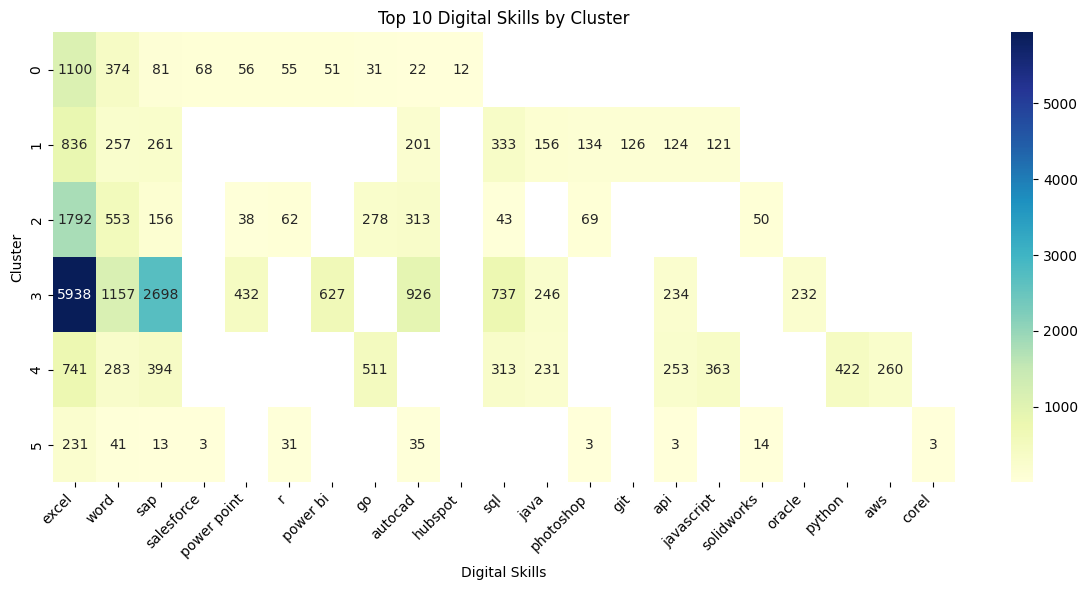

In [17]:
skills_by_cluster = df_arg.groupby('cluster')['digital_skills'].apply(lambda x: sum(x, []))
skills_summary = skills_by_cluster.apply(lambda x: pd.Series(x).value_counts().head(10))

# Visualize the top skills as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(skills_summary, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Top 10 Digital Skills by Cluster")
plt.xlabel("Digital Skills")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


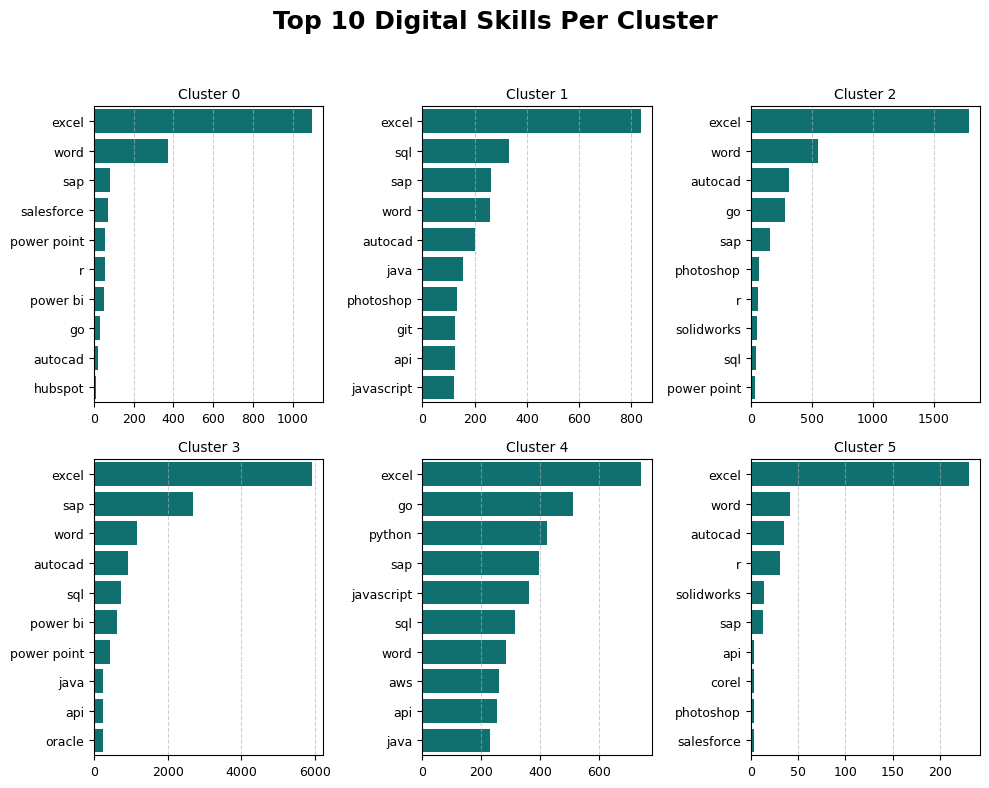

In [18]:
# Prepare top 10 skills per cluster
digital_skills_distribution = df_arg.explode('digital_skills').groupby(['cluster', 'digital_skills']).size().reset_index(name='count')


fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Top 10 Digital Skills Per Cluster', fontsize=18, fontweight='bold')

for idx, cluster_num in enumerate(sorted(df_arg['cluster'].unique())):
    ax = axes[idx // 3, idx % 3]
    cluster_data = digital_skills_distribution[digital_skills_distribution['cluster'] == cluster_num]
    top_skills = cluster_data.sort_values('count', ascending=False).head(10)

    sns.barplot(x='count', y='digital_skills', data=top_skills, ax=ax, color='teal')
    ax.set_title(f'Cluster {cluster_num}', fontsize=10)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', labelsize=9)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

